## OSR test for case 1a (with no exogenous features)

>   ### performace decrease with respect to m3/h as exogenous feature in model

>>#### Test RMSE: 0.120
>>#### Test MAPE: inf
>>#### Test SMAPE: 5.820
>>#### Correlation: 0.949
>>#### R-squared: 0.900

>   #### target feature:             MW (thermic) 
>   #### exogenous feature:          no exogenous features
>   ### statistical esimator:       SARIMAX - Seasonal Auto-Regressive Integrated Moving Average
   


> RENergetic Project: fitting a forcasting estimator to predict MW over time and use of one exo_m3/h (instant flow)

>This model is the best estimator based on model proptotyping run in IBM Modeler 18.2 software at 26/04/21

> Dataframe from: XXX building complex 
>   ### time window covered: 15-Aug-2020 -> 09 Nov 2020

>Other buildings in OXX and dataframes available - contact DR D. Baranzini)

>> Coding by Dr Daniele Baranzini



In [83]:
# method to check working directory
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_


In [84]:
%matplotlib inline

In [85]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from datetime import datetime                              # maybe necessary for future actions on dates and indexing
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     # toy-model for SARIMAX estimator
from random import random

In [111]:
# rename the column 'Unnamed: 0' to Timestamp and render it the dataframe index
df_base = pd.read_excel('TEST_1a.xls')
df_base.rename( columns={'Unnamed: 0':'Timestamp'}, inplace=True)
df_base = df_base [['Timestamp','m3_h', 'MW']]
df_base.index = df_base['Timestamp']

#print(df_base.dtypes)
#df_base.head()
#print(df_base.describe())

ts1 = df_base.loc[:'2020-11-09']
#ts1.head(2090)
#df_base.head(3001)
ts1 = ts1[['MW']]                                   #the Timestamp column is removed as it is doubled with index 
endog = ts1['MW']

ts1

,MW
Timestamp,
2020-08-15 00:00:00.000,0.94
2020-08-15 01:00:00.029,0.94
2020-08-15 01:59:59.971,1.07
2020-08-15 03:00:00.000,0.91
2020-08-15 04:00:00.029,0.99
...,...
2020-11-09 19:00:00.029,1.76
2020-11-09 19:59:59.971,1.76
2020-11-09 21:00:00.000,1.91


In [112]:
# fit the complete model
model = SARIMAX(endog, order=(1,1,2), seasonal_order=(1,0,1,24))
fit_res = model.fit(disp=False, maxiter=250)
print(fit_res.summary())


C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DANIELE\Anaconda3\envs\RENergectic_Forecasting_Models_\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                   MW   No. Observations:                 2088
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 24)   Log Likelihood                1492.072
Date:                              Fri, 30 Apr 2021   AIC                          -2972.144
Time:                                      11:03:55   BIC                          -2938.283
Sample:                                           0   HQIC                         -2959.738
                                             - 2088                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7804      0.010     81.923      0.000       0.762       0.799
ma.L1         -1.32

In [115]:
# In-sample forecast (baseline approach no train test split for backtesting)
yhat = fit_res.predict(start=0, end=2087)        # example of Out-of-sample forecast with exo 
yhat                                             # predict() can do In- or Out-of-sample forecast

Timestamp
2020-08-15 00:00:00.000    0.000000
2020-08-15 01:00:00.029    0.940000
2020-08-15 01:59:59.971    0.940000
2020-08-15 03:00:00.000    1.012528
2020-08-15 04:00:00.029    0.952388
                             ...   
2020-11-09 19:00:00.029    1.861898
2020-11-09 19:59:59.971    1.809451
2020-11-09 21:00:00.000    1.831335
2020-11-09 22:00:00.029    1.929343
2020-11-09 22:59:59.971    2.008973
Name: predicted_mean, Length: 2088, dtype: float64

In [117]:
ts1['Forecast_SARIMAX']=yhat                     # appending forecast values to ts1 dataframe
ts1

,MW,Forecast_SARIMAX
Timestamp,,
2020-08-15 00:00:00.000,0.94,0.000000
2020-08-15 01:00:00.029,0.94,0.940000
2020-08-15 01:59:59.971,1.07,0.940000
2020-08-15 03:00:00.000,0.91,1.012528
2020-08-15 04:00:00.029,0.99,0.952388
...,...,...
2020-11-09 19:00:00.029,1.76,1.861898
2020-11-09 19:59:59.971,1.76,1.809451
2020-11-09 21:00:00.000,1.91,1.831335


Test RMSE: 0.120
Test MAPE: inf
Test SMAPE: 5.820
Correlation: 0.949
R-squared: 0.900


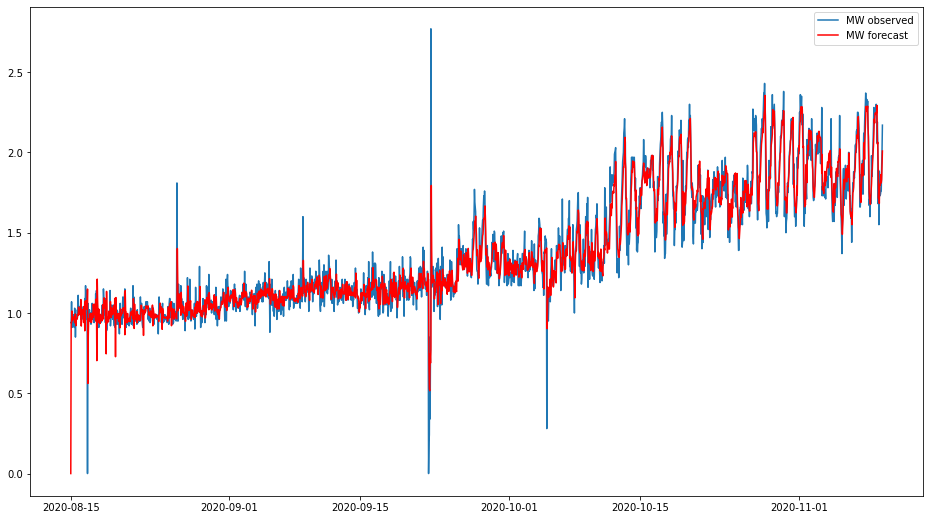

In [118]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=ts1['MW']
pred=ts1['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'MW observed')
plt.plot(pred, color='red', label = 'MW forecast')
plt.legend()
plt.show()

In [ ]:
## end